<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/dimensionality/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BF%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Алгоритм понижения размерности t-SNE

#### Введение
t-SNE (t-distributed Stochastic Neighbor Embedding) — это алгоритм для понижения размерности данных, который широко используется в задачах визуализации высокоразмерных данных. Он особенно эффективен для того, чтобы представить данные в двух- или трехмерном пространстве так, чтобы сохранялись локальные структуры данных. В отличие от таких методов, как PCA (Principal Component Analysis), которые фокусируются на глобальных свойствах данных, t-SNE сосредотачивается на локальных отношениях между точками.

В этой лекции мы рассмотрим математические основы t-SNE, объясним его принцип работы и разберем ключевые идеи, которые лежат в основе этого метода.



#### 1. Принцип работы t-SNE

Основная цель t-SNE — преобразовать высокоразмерные данные в низкоразмерное пространство таким образом, чтобы сохранить сходство между точками. Для этого он использует два распределения вероятностей:

- **Распределение вероятностей в исходном пространстве** (высокой размерности).
- **Распределение вероятностей в целевом пространстве** (низкой размерности).

Алгоритм минимизирует дивергенцию Кульбака–Лейблера (KL-divergence) между этими двумя распределениями.



#### 2. Распределение вероятностей в исходном пространстве

Пусть у нас есть набор данных $mathbf{X} = \{\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_n\}$, где каждая точка $mathbf{x}_i $ имеет размерность $D$. Мы хотим найти вероятностное распределение, которое описывает сходство между каждой парой точек $mathbf{x}_i $ и $mathbf{x}_j $.

##### Сходство между точками в исходном пространстве:
Сходство между точками $mathbf{x}_i $ и $mathbf{x}_j $ определяется через функцию Гаусса:

$$
p_{j|i} = \frac{\exp(-\|\mathbf{x}_i - \mathbf{x}_j\|^2 / (2\sigma_i^2))}{\sum_{k \neq i} \exp(-\|\mathbf{x}_i - \mathbf{x}_k\|^2 / (2\sigma_i^2))},
$$

где:
- $|\mathbf{x}_i - \mathbf{x}_j\|$ — евклидово расстояние между точками $mathbf{x}_i $ и $mathbf{x}_j $,
- $sigma_i $ — параметр масштабирования, называемый "пропускной способностью" (perplexity), который регулирует ширину распределения.

Значение $p_{j|i}$ показывает вероятность того, что точка $mathbf{x}_j $ является соседом точки $mathbf{x}_i $.

Для симметризации распределения вероятностей, мы вычисляем совместное распределение:

$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}.
$$



#### 3. Распределение вероятностей в целевом пространстве

После того как мы преобразовали данные в низкоразмерное пространство, получаем новое множество точек $mathbf{Y} = \{\mathbf{y}_1, \mathbf{y}_2, \dots, \mathbf{y}_n\}$, где каждая точка $mathbf{y}_i $ имеет размерность $D$ (обычно $ d = 2 $ или $ d = 3 $).

##### Сходство между точками в целевом пространстве:
В низкоразмерном пространстве сходство между точками $mathbf{y}_i $ и $mathbf{y}_j $ определяется через t-распределение Стьюдента с одной степенью свободы (эквивалент кэшированному распределению):

$$
q_{ij} = \frac{(1 + \|\mathbf{y}_i - \mathbf{y}_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|\mathbf{y}_k - \mathbf{y}_l\|^2)^{-1}},
$$

где $q_{ij}$ показывает вероятность того, что точка $mathbf{y}_j $ является соседом точки $mathbf{y}_i $ в низкоразмерном пространстве.



#### 4. Минимизация дивергенции Кульбака–Лейблера

Основная задача t-SNE — минимизировать дивергенцию Кульбака–Лейблера между распределениями $ P $ (исходное пространство) и $q $ (целевое пространство):

$$
C = KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}.
$$

Эта функция потерь измеряет несоответствие между распределениями вероятностей в исходном и целевом пространствах. Минимизация $ C $ приводит к тому, что точки, которые близки друг другу в исходном пространстве, также будут близки в целевом пространстве.



#### 5. Оптимизация с помощью градиентного спуска

Для минимизации функции потерь $ C $ используется градиентный спуск. Градиент по координатам $mathbf{y}_i $ вычисляется следующим образом:

$$
\frac{\partial C}{\partial \mathbf{y}_i} = 4 \sum_j (p_{ij} - q_{ij}) (\mathbf{y}_i - \mathbf{y}_j) (1 + \|\mathbf{y}_i - \mathbf{y}_j\|^2)^{-1}.
$$

На каждом шаге градиентного спуска обновляются координаты точек $mathbf{y}_i $ в направлении, противоположном градиенту:

$$
\mathbf{y}_i^{(t+1)} = \mathbf{y}_i^{(t)} - \eta \frac{\partial C}{\partial \mathbf{y}_i},
$$

где $eta $ — скорость обучения.



#### 6. Особенности t-SNE

- **Пропускная способность (Perplexity):** Это важный гиперпараметр, который контролирует баланс между локальными и глобальными структурами данных. Перплексия интерпретируется как количество соседей для каждой точки. Чем выше перплексия, тем больше учитываются глобальные структуры.
  
- **Нелинейность:** t-SNE является нелинейным методом понижения размерности, что позволяет ему лучше сохранять сложные структуры данных, чем линейные методы, такие как PCA.

- **Чувствительность к начальным условиям:** Результаты t-SNE могут зависеть от случайного начального положения точек в низкоразмерном пространстве. Поэтому рекомендуется использовать несколько запусков алгоритма с разными начальными условиями.



#### Заключение

t-SNE — мощный инструмент для визуализации высокоразмерных данных. Его основная идея заключается в том, чтобы сохранить локальные структуры данных при переходе к низкоразмерному пространству. Математическая основа метода основана на использовании распределений вероятностей и минимизации дивергенции Кульбака–Лейблера. Хотя t-SNE имеет свои ограничения (например, чувствительность к параметрам и начальным условиям), он остается одним из самых популярных методов для визуализации данных в современной науке о данных.

$$
\boxed{\text{Ключевая формула: } C = KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}.}
$$



Пример с конкретными числами, который поможет проиллюстрировать основные шаги t-SNE. Мы будем использовать упрощенный случай для лучшего понимания.



### Пример: Точка входа

Пусть у нас есть три точки в двумерном пространстве:

$$
\mathbf{x}_1 = (0, 0), \quad \mathbf{x}_2 = (1, 1), \quad \mathbf{x}_3 = (2, 2).
$$

Мы хотим преобразовать эти точки в одномерное пространство ($d=1$) с помощью t-SNE.



### Шаг 1: Вычисление распределения вероятностей $p_{ij}$ в исходном пространстве

#### Расчет расстояний между точками:
$$
\|\mathbf{x}_1 - \mathbf{x}_2\| = \sqrt{(0-1)^2 + (0-1)^2} = \sqrt{2},
$$
$$
\|\mathbf{x}_1 - \mathbf{x}_3\| = \sqrt{(0-2)^2 + (0-2)^2} = \sqrt{8} = 2\sqrt{2},
$$
$$
\|\mathbf{x}_2 - \mathbf{x}_3\| = \sqrt{(1-2)^2 + (1-2)^2} = \sqrt{2}.
$$

#### Выбор параметра $\sigma_i$:
Для упрощения предположим, что все точки имеют одинаковое значение $\sigma = 1$. Это означает, что функция Гаусса будет вычисляться как:

$$
p_{j|i} = \frac{\exp(-\|\mathbf{x}_i - \mathbf{x}_j\|^2 / 2)}{\sum_{k \neq i} \exp(-\|\mathbf{x}_i - \mathbf{x}_k\|^2 / 2)}.
$$

#### Вычисление $p_{j|i}$ для каждой точки:

**Для $\mathbf{x}_1$:**
$$
p_{2|1} = \frac{\exp(-\|\mathbf{x}_1 - \mathbf{x}_2\|^2 / 2)}{\exp(-\|\mathbf{x}_1 - \mathbf{x}_2\|^2 / 2) + \exp(-\|\mathbf{x}_1 - \mathbf{x}_3\|^2 / 2)},
$$
$$
p_{2|1} = \frac{\exp(-(\sqrt{2})^2 / 2)}{\exp(-(\sqrt{2})^2 / 2) + \exp(-(\sqrt{8})^2 / 2)} = \frac{\exp(-1)}{\exp(-1) + \exp(-4)}.
$$

Поскольку $\exp(-4)$ очень маленькое число, можно приблизительно считать:

$$
p_{2|1} \approx \frac{\exp(-1)}{\exp(-1)} = 1.
$$

Аналогично:
$$
p_{3|1} \approx 0.
$$

**Для $\mathbf{x}_2$:**
$$
p_{1|2} \approx 1, \quad p_{3|2} \approx 0.
$$

**Для $\mathbf{x}_3$:**
$$
p_{1|3} \approx 0, \quad p_{2|3} \approx 1.
$$

#### Симметризация распределения:
$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}.
$$

Подставляя значения:
$$
p_{12} = \frac{1 + 1}{6} = \frac{1}{3}, \quad p_{13} = \frac{0 + 0}{6} = 0,
$$
$$
p_{23} = \frac{0 + 1}{6} = \frac{1}{6}.
$$



### Шаг 2: Вычисление распределения вероятностей $q_{ij}$ в целевом пространстве

Предположим, что начальные координаты точек в одномерном пространстве равны:

$$
\mathbf{y}_1 = 0, \quad \mathbf{y}_2 = 1, \quad \mathbf{y}_3 = 2.
$$

Расчет расстояний:
$$
\|\mathbf{y}_1 - \mathbf{y}_2\| = |0 - 1| = 1, \quad \|\mathbf{y}_1 - \mathbf{y}_3\| = |0 - 2| = 2, \quad \|\mathbf{y}_2 - \mathbf{y}_3\| = |1 - 2| = 1.
$$

Вычисление $q_{ij}$:
$$
q_{ij} = \frac{(1 + \|\mathbf{y}_i - \mathbf{y}_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|\mathbf{y}_k - \mathbf{y}_l\|^2)^{-1}}.
$$

**Для $q_{12}$:**
$$
q_{12} = \frac{(1 + 1^2)^{-1}}{(1 + 1^2)^{-1} + (1 + 2^2)^{-1} + (1 + 1^2)^{-1}} = \frac{1/2}{1/2 + 1/5 + 1/2} = \frac{1/2}{9/10} = \frac{5}{9}.
$$

**Для $q_{13}$:**
$$
q_{13} = \frac{(1 + 2^2)^{-1}}{(1 + 1^2)^{-1} + (1 + 2^2)^{-1} + (1 + 1^2)^{-1}} = \frac{1/5}{9/10} = \frac{2}{9}.
$$

**Для $q_{23}$:**
$$
q_{23} = \frac{(1 + 1^2)^{-1}}{(1 + 1^2)^{-1} + (1 + 2^2)^{-1} + (1 + 1^2)^{-1}} = \frac{1/2}{9/10} = \frac{5}{9}.
$$



### Шаг 3: Минимизация дивергенции Кульбака–Лейблера

Функция потерь:
$$
C = KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}.
$$

Подставляя значения:
$$
C = p_{12} \log \frac{p_{12}}{q_{12}} + p_{13} \log \frac{p_{13}}{q_{13}} + p_{23} \log \frac{p_{23}}{q_{23}},
$$
$$
C = \frac{1}{3} \log \frac{\frac{1}{3}}{\frac{5}{9}} + 0 \cdot \log \frac{0}{\frac{2}{9}} + \frac{1}{6} \log \frac{\frac{1}{6}}{\frac{5}{9}}.
$$

Упростим каждое слагаемое:
$$
\frac{1}{3} \log \frac{\frac{1}{3}}{\frac{5}{9}} = \frac{1}{3} \log \frac{3}{5},
$$
$$
\frac{1}{6} \log \frac{\frac{1}{6}}{\frac{5}{9}} = \frac{1}{6} \log \frac{3}{10}.
$$

Итоговая функция потерь:
$$
C = \frac{1}{3} \log \frac{3}{5} + \frac{1}{6} \log \frac{3}{10}.
$$



### Шаг 4: Обновление координат

Градиент по координатам:
$$
\frac{\partial C}{\partial \mathbf{y}_i} = 4 \sum_j (p_{ij} - q_{ij}) (\mathbf{y}_i - \mathbf{y}_j) (1 + \|\mathbf{y}_i - \mathbf{y}_j\|^2)^{-1}.
$$

Обновление координат:
$$
\mathbf{y}_i^{(t+1)} = \mathbf{y}_i^{(t)} - \eta \frac{\partial C}{\partial \mathbf{y}_i}.
$$

Этот процесс повторяется до сходимости.



Этот пример показывает, как t-SNE работает на небольшом наборе данных. Хотя реальные данные обычно многомерны и содержат больше точек, принцип остается тем же: минимизация дивергенции Кульбака–Лейблера между распределениями $P$ и $Q$.




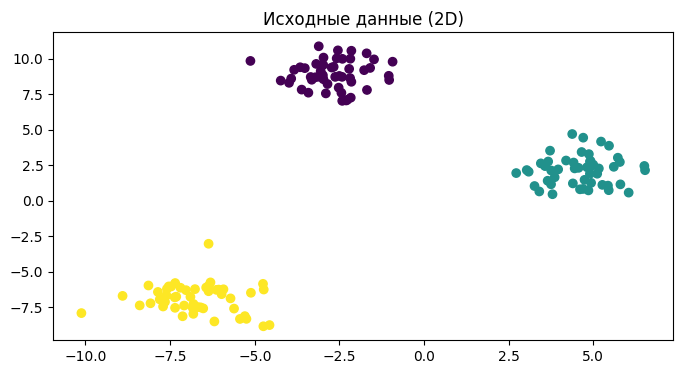

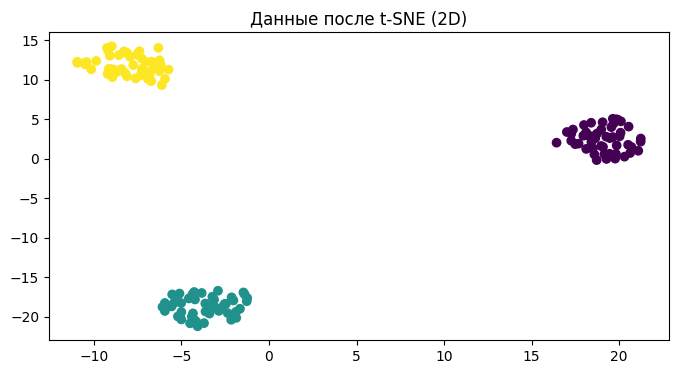

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

# Шаг 1: Создание синтетического набора данных
# Генерируем 3 кластера с 50 точками в каждом
X, y = make_blobs(n_samples=150, centers=3, n_features=2, random_state=42)

# Выводим исходные данные
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Исходные данные (2D)")
plt.show()

# Шаг 2: Применение t-SNE
# Создаем объект t-SNE с параметрами:
# - n_components=2 (целевая размерность)
# - perplexity=30 (пропускная способность)
# - learning_rate='auto' (автоматический выбор скорости обучения)
# - init='random' (случайная инициализация)
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='random', random_state=42)

# Преобразуем данные
X_embedded = tsne.fit_transform(X)

# Шаг 3: Визуализация результатов
plt.figure(figsize=(8, 4))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis')
plt.title("Данные после t-SNE (2D)")
plt.show()